<a href="https://colab.research.google.com/github/v-ipul/PYTHON_Webscrapping/blob/master/Transcript_Summarization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q transformers


     |████████████████████████████████| 2.9 MB 5.2 MB/s 
     |████████████████████████████████| 596 kB 32.7 MB/s 
     |████████████████████████████████| 895 kB 58.4 MB/s 
     |████████████████████████████████| 56 kB 4.4 MB/s 
     |████████████████████████████████| 3.3 MB 44.4 MB/s 


In [2]:
!pip install -q youtube_transcript_api

In [3]:
from transformers import pipeline
from youtube_transcript_api import YouTubeTranscriptApi

In [18]:
youtube_video = "https://www.youtube.com/watch?v=ZVO8Wt_PCgE"

In [19]:
video_id = youtube_video.split("=")[1]

In [20]:
video_id

'ZVO8Wt_PCgE'

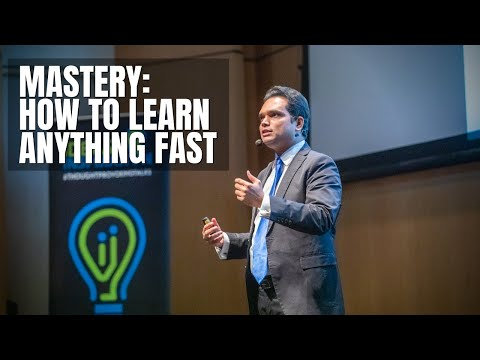

In [21]:
from IPython.display import YouTubeVideo
YouTubeVideo(video_id)

In [22]:
YouTubeTranscriptApi.get_transcript(video_id)
transcript = YouTubeTranscriptApi.get_transcript(video_id)

In [23]:
transcript[0:5]

[{'duration': 5.93, 'start': 0.41, 'text': '[Music]'},
 {'duration': 3.29, 'start': 3.05, 'text': '[Applause]'},
 {'duration': 7.811,
  'start': 6.859,
  'text': 'raise your hand if you think you have a'},
 {'duration': 6.421,
  'start': 10.019,
  'text': 'fantastic memory okay I can see a couple'},
 {'duration': 3.119,
  'start': 14.67,
  'text': 'of hands raising so let me make it easy'}]

In [24]:
result = ""
for i in transcript:
    result += ' ' + i['text']
#print(result)
print(len(result))

14961


In [25]:
summarizer = pipeline('summarization')

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 (https://huggingface.co/sshleifer/distilbart-cnn-12-6)


Downloading:   0%|          | 0.00/1.76k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.14G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

In [26]:
num_iters = int(len(result)/1000)
summarized_text = []
for i in range(0, num_iters + 1):
  start = 0
  start = i * 1000
  end = (i + 1) * 1000
  print("input text \n" + result[start:end])
  out = summarizer(result[start:end])
  out = out[0]
  out = out['summary_text']
  print("Summarized text\n"+out)
  summarized_text.append(out)

#print(summarized_text)

input text 
 [Music] [Applause] raise your hand if you think you have a fantastic memory okay I can see a couple of hands raising so let me make it easy for you I'm going to ask you easy question raise your hands if you think you have a bad memory Oh a lot more hands going up right now and what about the rest of you did not raise the hands you forgot to raise your hands well here's the goodness it really doesn't matter whether you think you have a good memory or not because it's a fact that you can train your brain to remember better to learn faster and to achieve mastery in anything you want in your life and I'd like to show you something really interesting here which actually demonstrates to you what you can do if you train your brain now I would request any five a few any five people can have a volunteer to please come here and rive something on the flip chart yeah we got two volunteers right from here so one two three thank you for thank you okay I promise you you don't have to rem